# Task 3 : Unsupervised Learning

Objective - Using unsupervised learning to find the optimum clusters in the Iris dataset.

Dataset Link - https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploring the data

In [2]:
url = 'https://drive.google.com/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-&export=download'
df = pd.read_csv(url)

df.set_index('Id', inplace=True)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualising the data

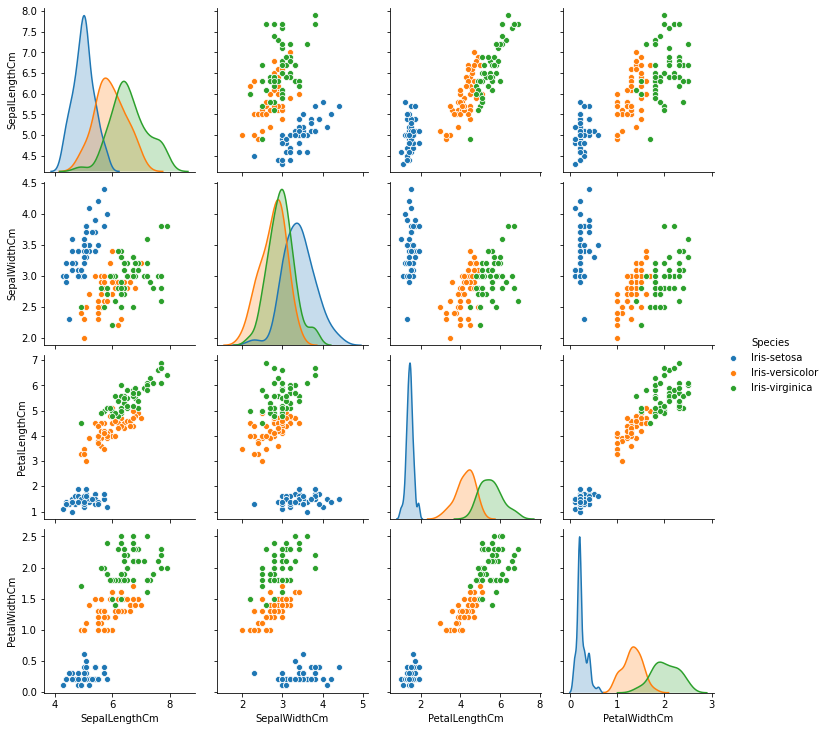

In [6]:
sns.pairplot(df, hue="Species");

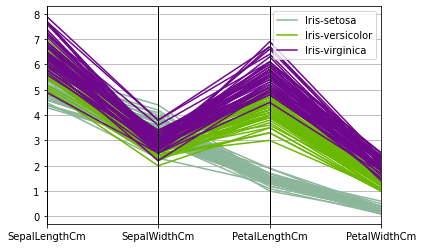

In [7]:
plt.figure()
pd.plotting.parallel_coordinates(df, 'Species');

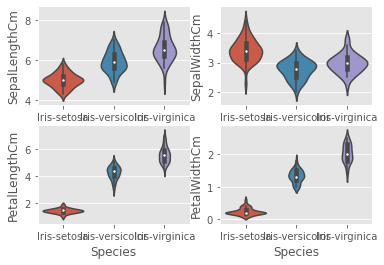

In [8]:
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = df);
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = df);
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = df);
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = df);

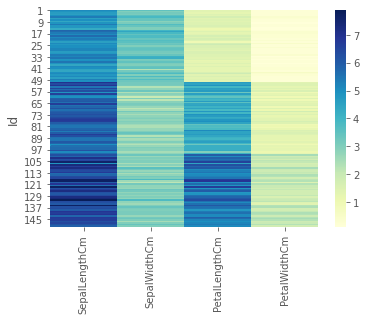

In [9]:
sns.heatmap(df.iloc[:,:-1], cmap="YlGnBu")

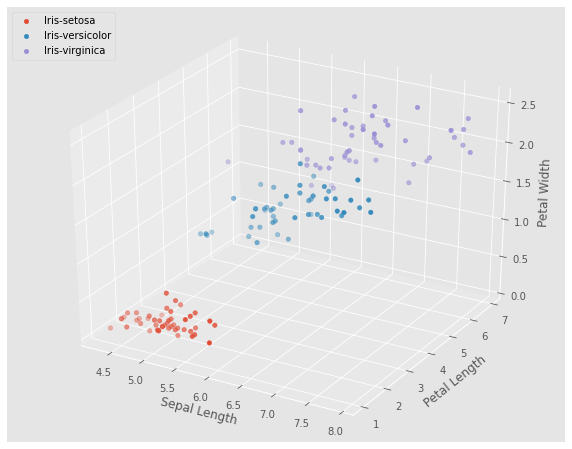

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for species, irissubset in df.groupby('Species'):
    ax.scatter(irissubset['SepalLengthCm'], irissubset['PetalLengthCm'], irissubset['PetalWidthCm'], label=species)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')
ax.legend(loc=2)

plt.show()

# Model Building

Importing the required libraries

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Initialising training and target values

In [12]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]

Finding the optimum number of clusters for k-means classification

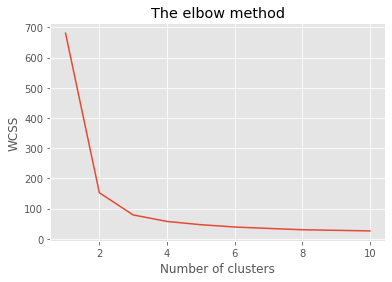

In [13]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Scaling and reducing the dimensions using PCA

In [14]:
X_normalized = StandardScaler().fit(X).transform(X)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)

Model Fitting

In [15]:
#choosing 3 as that is where the elbow occurs

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_pca)

KMeans(n_clusters=3)

Visualising the clusters with their centers

Text(0, 0.5, 'Feature 2')

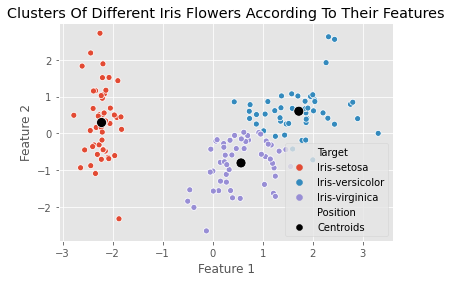

In [16]:
df1 = pd.DataFrame(X_pca)
df1['Target'] = kmeans.labels_

#Labeling them with the original labels
df1.Target = np.where(df1.Target == 0, 'Iris-setosa', df1.Target)
df1.Target = np.where(df1.Target == '1', 'Iris-versicolor', df1.Target)
df1.Target = np.where(df1.Target == '2', 'Iris-virginica', df1.Target)

sns.scatterplot(data=df1, x=df1.iloc[:,0], y=df1.iloc[:,1], hue='Target').set_title('Clusters Of Different Iris Flowers According To Their Features');

#getting the centers
df2 = pd.DataFrame(kmeans.cluster_centers_)
df2['Position'] = 'Centroids'


sns.scatterplot(data=df2, x=df2.iloc[:,0], y=df2.iloc[:,1], hue='Position', palette=['black'], s=100);

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')